## 1. Install and load packages/phyloseq object

In [1]:
# install.packages("viridis")
library(phyloseq)
library(ggplot2)
library(ggpubr)
library(viridis)
library(plyr); library(dplyr)
library(tidyverse)
load("../02-diversity/master_phyloseq.RData")
ps.dat

Loading required package: viridisLite


Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘tibble’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.3”
Warning message:
“package ‘readr’ was built under R version 4.1.3”
Warning message:
“package ‘purrr’ was built under R version 4.1.3”
Warning message:
“package ‘stringr’ was built under R version 4.1.3”
Warning message:
“package ‘forcats’ was built under R version 4.1.3”
Warning message:
“package ‘lubridate’ was built und

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14111 taxa and 1960 samples ]
sample_data() Sample Data:       [ 1960 samples by 26 sample variables ]
tax_table()   Taxonomy Table:    [ 14111 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 14111 tips and 14109 internal nodes ]

## 2. Compare CD4 counts across samples

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 2 rows containing non-finite values (`stat_pwc()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


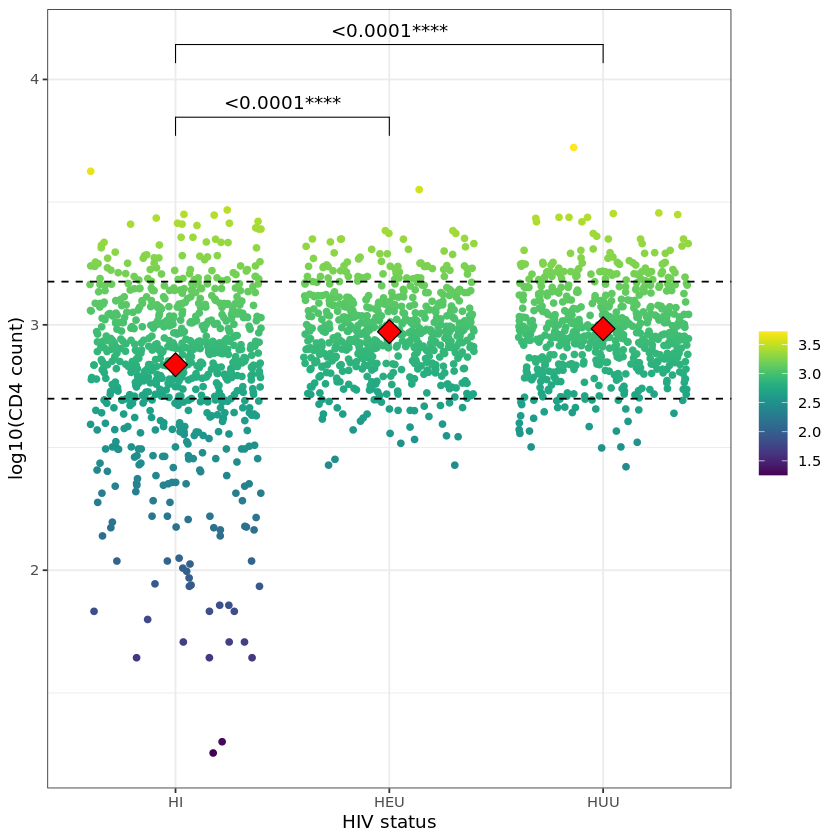

In [2]:
# all samples, split by HIV status
map <- sample_data(ps.dat)
map$hiv_status <- factor(map$hiv_status, levels=c("HI", "HEU", "HUU"))
ggplot(map, aes(x=hiv_status, y=log10(as.integer(cd4_count)))) + 
    geom_point(aes(col=log10(as.integer(cd4_count))), position="jitter") + 
    scale_color_viridis() + 
    theme_bw() +
    geom_hline(yintercept=c(log10(500), log10(1500)), linetype="dashed") +
    geom_pwc(label = "{p.format}{p.signif}", hide.ns =TRUE, p.adjust.method = "fdr") +
    stat_summary(geom = "point", fun = "mean", size = 5, shape = 23, fill = "red") +
    ylab("log10(CD4 count)") +
    xlab("HIV status") +
    theme(legend.title=element_blank())

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 2 rows containing non-finite values (`stat_pwc()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


png 
  2

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 2 rows containing non-finite values (`stat_pwc()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


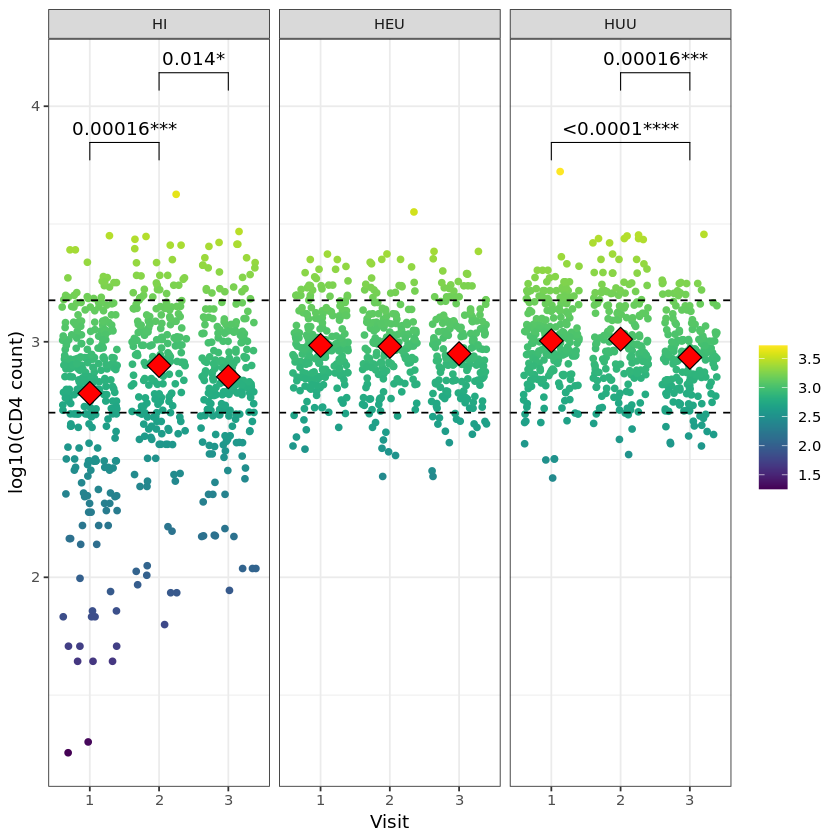

In [3]:
# now want to look at change in CD4 values over the three visits
pdf("cd4_dotplots.pdf")
ggplot(map, aes(x=visit_num, y=log10(as.integer(cd4_count)))) + 
    geom_point(aes(col=log10(as.integer(cd4_count))), position="jitter") + 
    scale_color_viridis() + 
    theme_bw() +
    geom_hline(yintercept=c(log10(500), log10(1500)), linetype="dashed") +
    geom_pwc(label = "{p.format}{p.signif}", hide.ns =TRUE, p.adjust.method = "fdr") +
    stat_summary(geom = "point", fun = "mean", size = 5, shape = 23, fill = "red") +
    ylab("log10(CD4 count)") +
    xlab("Visit") +
    theme(legend.title=element_blank()) +
    facet_grid(cols=vars(hiv_status))
dev.off()
ggplot(map, aes(x=visit_num, y=log10(as.integer(cd4_count)))) + 
    geom_point(aes(col=log10(as.integer(cd4_count))), position="jitter") + 
    scale_color_viridis() + 
    theme_bw() +
    geom_hline(yintercept=c(log10(500), log10(1500)), linetype="dashed") +
    geom_pwc(label = "{p.format}{p.signif}", hide.ns =TRUE, p.adjust.method = "fdr") +
    stat_summary(geom = "point", fun = "mean", size = 5, shape = 23, fill = "red") +
    ylab("log10(CD4 count)") +
    xlab("Visit") +
    theme(legend.title=element_blank()) +
    facet_grid(cols=vars(hiv_status))

In [4]:
# cd4 counts by individual over the three visits?
indv <- as.data.frame(cbind(map$study_id, map$visit_num, as.character(map$hiv_status), map$cd4_count))
colnames(indv) <- c("study_id", "visit_num", "hiv_status", "cd4_count")
# this will have some duplicate lines because more than one tooth per individual per visit in some instances
head(indv)
indv <- indv[!duplicated(indv),]
# if this comes back as false you're good to go
levels(as.factor(duplicated(indv)))

,study_id,visit_num,hiv_status,cd4_count
,<chr>,<chr>,<chr>,<chr>
1,DM00001,1,HI,638
2,DM00001,2,HI,1504
3,DM00003,3,HI,1255
4,DM00003,3,HI,1255
5,DM00004,3,HI,419
6,DM00005,2,HUU,610


[1] "FALSE"

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Picking joint bandwidth of 129

Warning message:
“Removed 2 rows containing non-finite values (`stat_density_ridges()`).”


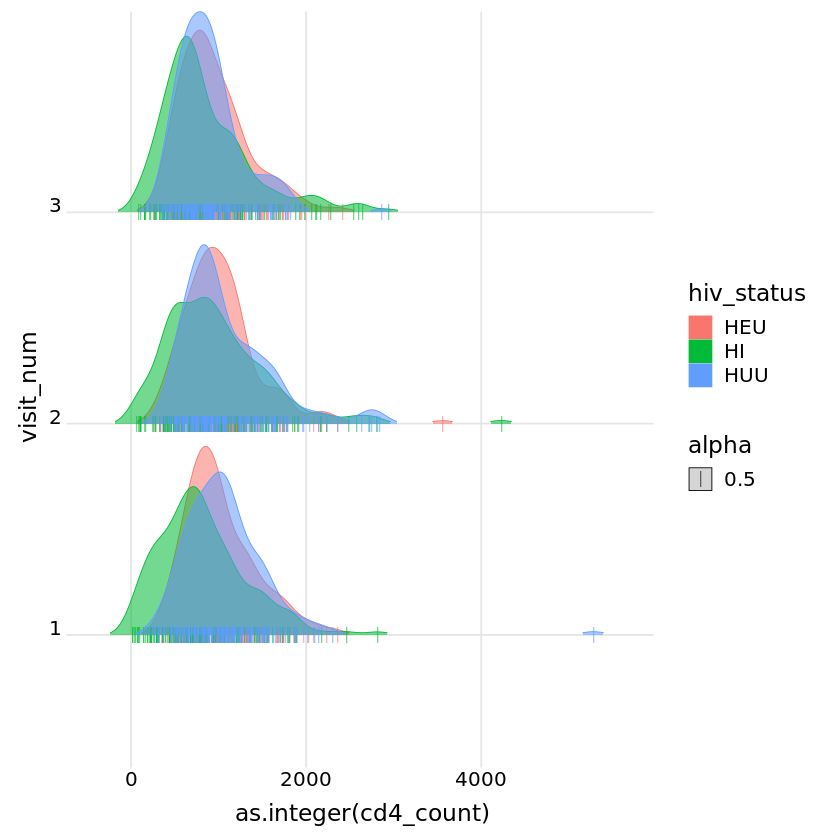

In [5]:
# install.packages("ggridges")
library(ggridges)
ggplot(indv, aes(x = as.integer(cd4_count), y = visit_num, color = hiv_status, point_color = hiv_status, fill = hiv_status, alpha=0.5)) +
    geom_density_ridges(
    jittered_points = TRUE, scale = .95, rel_min_height = .01,
    point_shape = "|", point_size = 3, size = 0.25,
    position = position_points_jitter(height = 0)) +
    coord_cartesian(clip = "off") +
    theme_ridges(center = TRUE)

In [6]:
# these aren't that easy to read -- also don't give a very good idea of what is happening on the individual level
indv.sum <- ddply(indv, c("hiv_status", "visit_num"), summarise,
               N    = length(as.integer(cd4_count)),
               mean = mean(as.integer(cd4_count), na.rm=TRUE),
               sd   = sd(as.integer(cd4_count), na.rm=TRUE),
               se   = sd / sqrt(N)
)
indv.sum

Warning message:
“There were 3 warnings in `.fun()`.
The first warning was:
ℹ In argument: `N = length(as.integer(cd4_count))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”
Warning message:
“There were 3 warnings in `.fun()`.
The first warning was:
ℹ In argument: `N = length(as.integer(cd4_count))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


hiv_status,visit_num,N,mean,sd,se
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
HEU,1,163,1019.9325,396.3214,31.04229
HEU,2,167,1021.8503,438.7620,33.95243
HEU,3,165,950.9756,396.4966,30.86722
HI,1,167,817.6048,499.3370,38.63986
HI,2,158,970.3165,601.5428,47.85618
HI,3,166,865.8303,533.2868,41.39108
HUU,1,153,1079.3922,522.2857,42.22430
HUU,2,154,1089.0325,507.1677,40.86874
HUU,3,157,898.0510,371.4938,29.64843


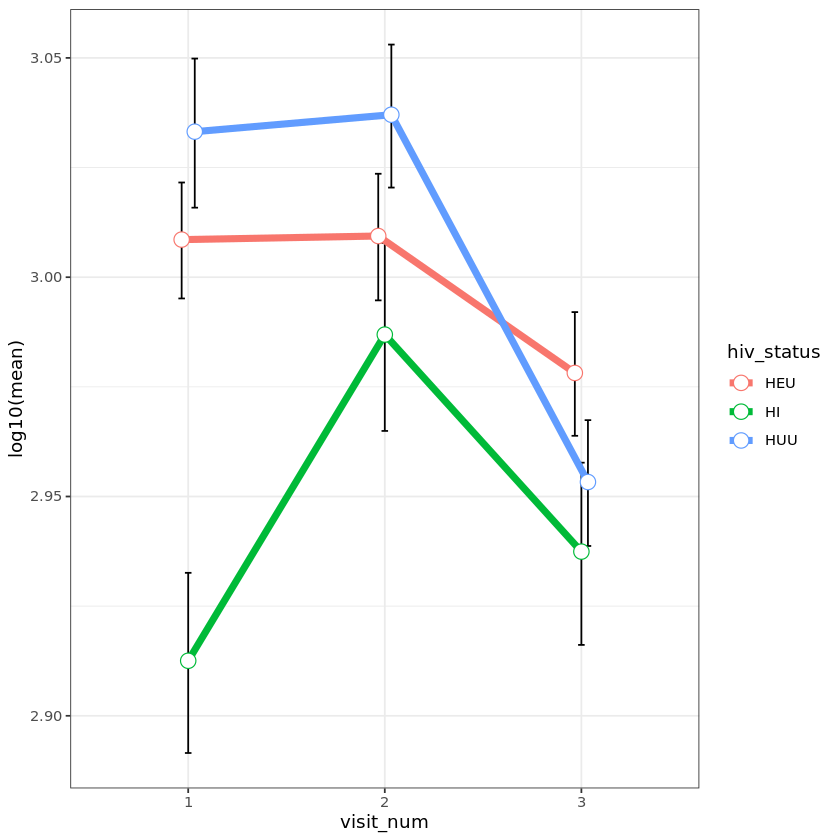

In [7]:
pd <- position_dodge(0.1)
ggplot(indv.sum, aes(x=visit_num, y=log10(mean), colour=hiv_status, group=hiv_status)) + 
    geom_errorbar(aes(ymin=log10(mean-se), ymax=log10(mean+se)), colour="black", width=.1, position=pd) +
    geom_line(position=pd, lwd=2) +
    geom_point(position=pd, size=4, shape=21, fill="white") +
    theme_bw() 

Picking joint bandwidth of 0.568

Warning message:
“Using the `size` aesthetic with geom_segment was deprecated in ggplot2 3.4.0.
ℹ Please use the `linewidth` aesthetic instead.”


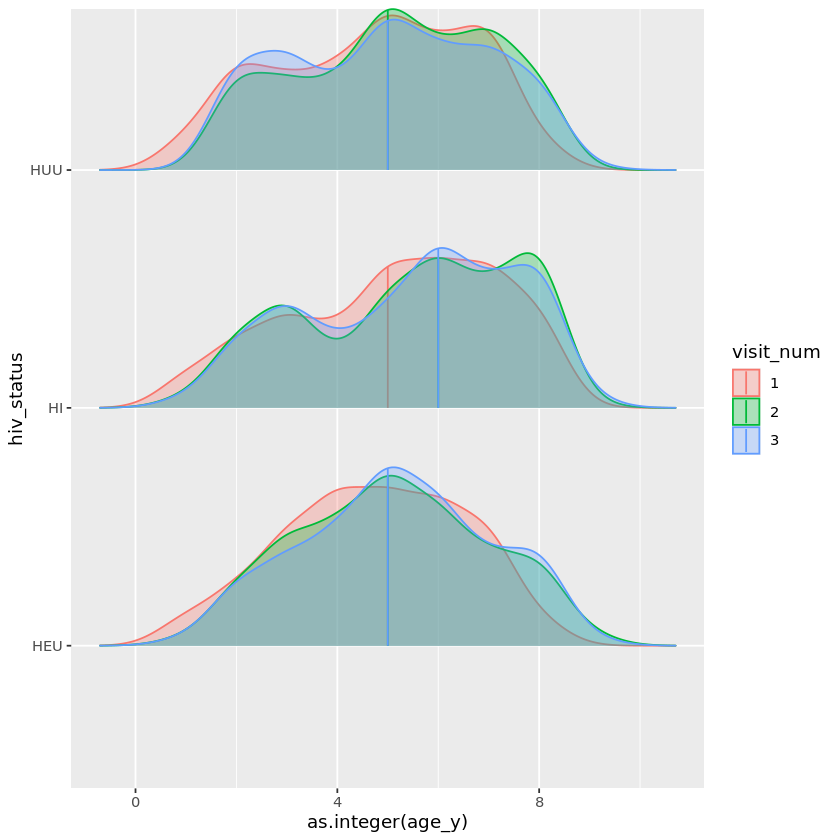

In [8]:
# as CD4 counts lower with age -- is the dip at visit three due to an overall increase in the cohort's age?
temp <- as.data.frame(cbind(map$study_id, map$visit_num, as.character(map$hiv_status), map$cd4_count, map$age_y))
colnames(temp) <- c("study_id", "visit_num", "hiv_status", "cd4_count", "age_y")
# head(temp)
temp$age_y <- factor(temp$age_y, levels=c("3", "4", "5", "6", "7", "8", "9", "10", "11"))

ggplot(temp, aes(x = as.integer(age_y), y = hiv_status, color=visit_num, fill=visit_num)) +
    geom_density_ridges(scale=0.75, quantile_lines=TRUE, quantile_fun=function(x,...)median(x), alpha=0.3) +
                        coord_cartesian(clip="off")
                        ### THIS MIGHT BE BETTER VIEWED AS BOXPLOT WITH JITTER? OR RAIN CLOUD PLOT

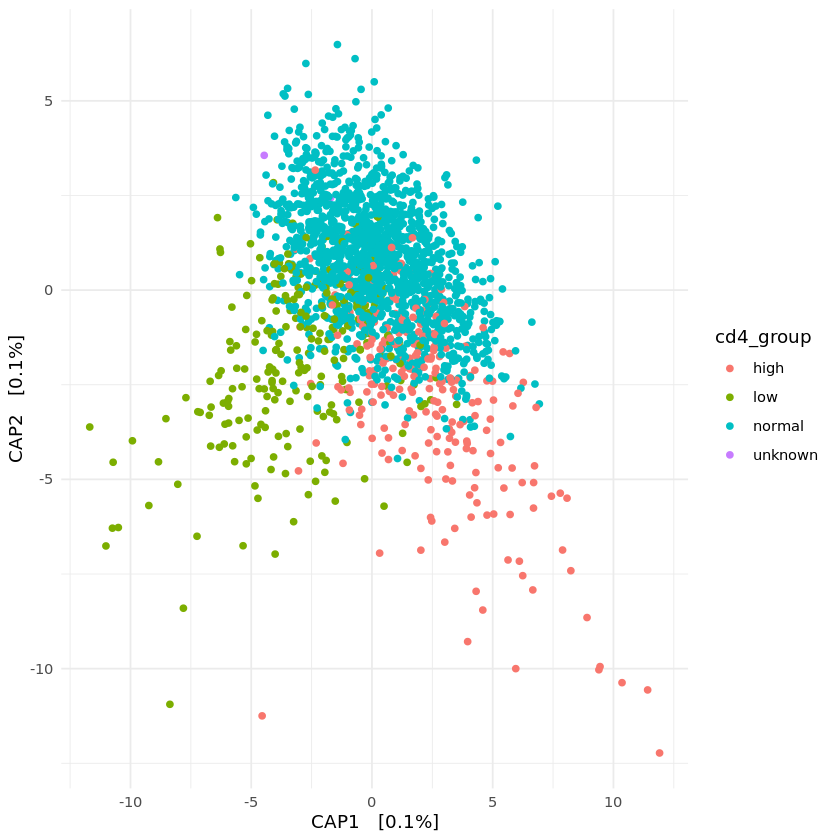

In [9]:
# is there a significant difference between the oral community of kids with low CD4 counts?
# BiocManager::install("ComplexHeatmap")
# install.packages("microViz", repos = c(davidbarnett = "https://david-barnett.r-universe.dev", getOption("repos")))
suppressPackageStartupMessages(library(microViz))
ps.dat.clr <- microbiome::transform(ps_drop_incomplete(ps.dat, vars="cd4_group"), transform="clr", target="OTU")
ordcap <- ordinate(ps.dat.clr, "CAP", "euclidean", ~cd4_group)
plot_ordination(ps.dat.clr, ordcap, "samples", color="cd4_group") + 
    theme_minimal()

In [10]:
# are low and high cd4 counts linked to higher dispersal?
# first pull sample data from phyloseq object
metadata <- as(sample_data(ps.dat.clr), "data.frame")
# calculate aitchison distance (from CLR transformed data)
clr.dist <- dist(otu_table(ps.dat.clr), method="euclidean")

[1] "Beta disperson CD4 group"



	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = clr.dist, group =
phyloseq::sample_data(ps.dat.clr)$cd4_group)

No. of Positive Eigenvalues: 1959
No. of Negative Eigenvalues: 0

Average distance to median:
   high     low  normal unknown 
  81.84   80.89   81.52   62.58 

Eigenvalues for PCoA axes:
(Showing 8 of 1959 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
206493 150802 113922  89675  65516  58981  58144  53195 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups       3    832  277.48 1.4594    999  0.208
Residuals 1956 371907  190.14                     

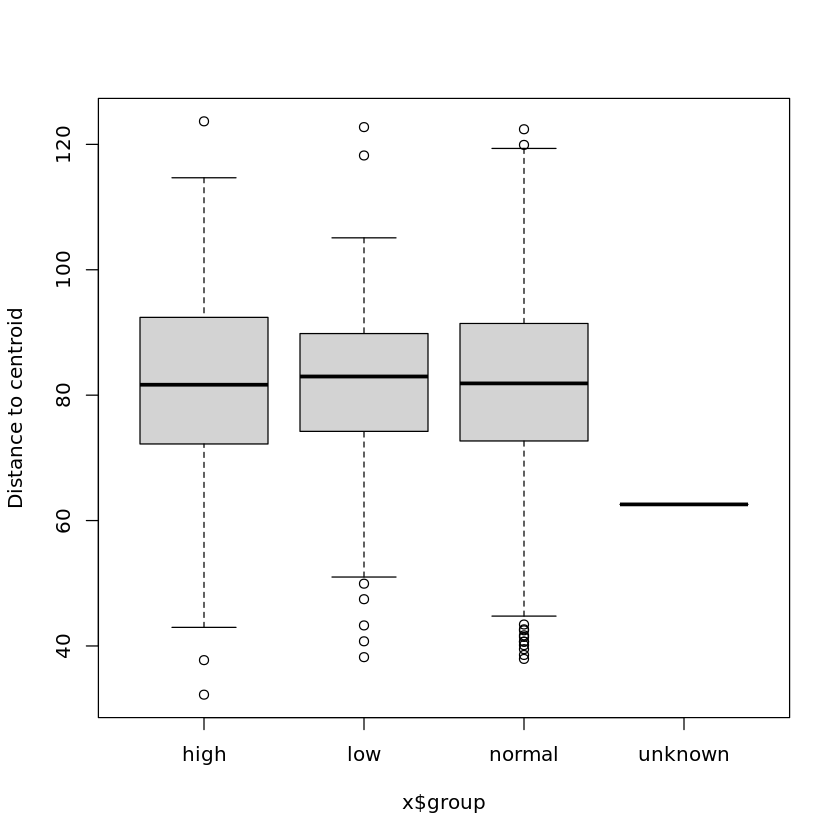

In [11]:
dispr <- vegan::betadisper(clr.dist, phyloseq::sample_data(ps.dat.clr)$cd4_group)
print("Beta disperson CD4 group")
dispr
vegan::permutest(dispr)
betadis <- boxplot(dispr)

Loading required package: permute

Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 4.1.3”
This is vegan 2.6-4



,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sample_data(ps.dat.clr)$cd4_group,3,32798.51,0.00244621,1.59884,0.001
Residual,1956,13375085.49,0.99755379,NA,NA
Total,1959,13407884.00,1.00000000,NA,NA


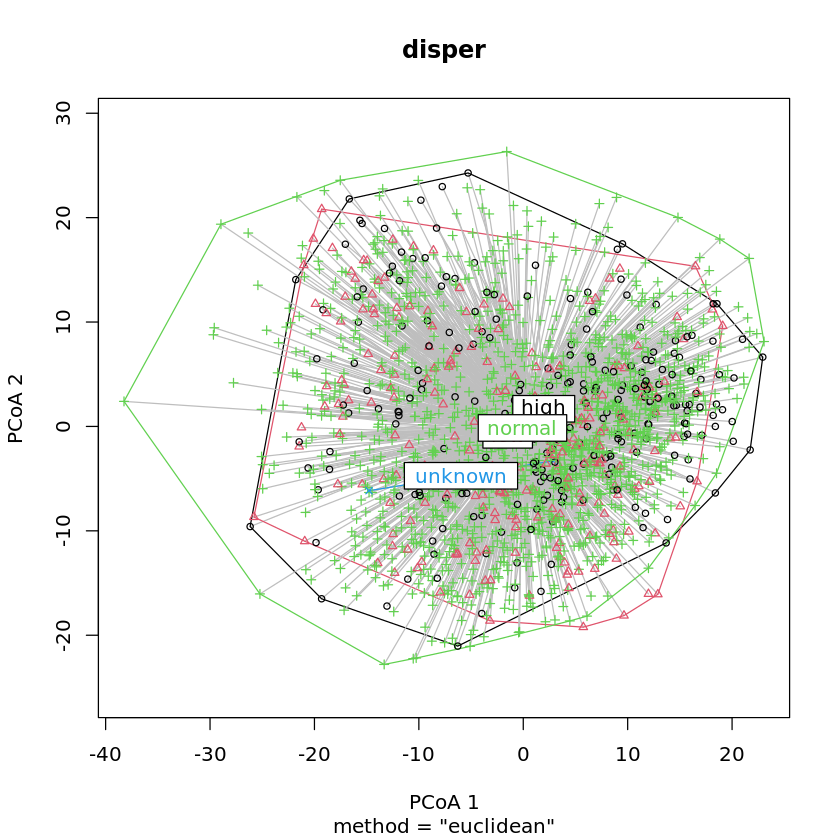

In [12]:
# now try with beta dispersion centroids
library(vegan)
dist <- phyloseq::distance(ps.dat.clr, method="euclidean", type="samples") 
disper <- betadisper(dist, group=sample_data(ps.dat.clr)$cd4_group, type="centroid")
adonis2(dist ~ sample_data(ps.dat.clr)$cd4_group)
plot(disper)

In [13]:
# PERMANOVA test
adonis2(dist ~ hiv_status * cd4_group, data=metadata)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hiv_status,2,40215.98,0.002999428,2.948868,0.001
cd4_group,3,30843.95,0.002300434,1.507771,0.001
hiv_status:cd4_group,5,46818.74,0.003491881,1.373208,0.001
Residual,1949,13290005.32,0.991208257,NA,NA
Total,1959,13407884.00,1.000000000,NA,NA


Now want to try balance analysis to see which taxa are most influential on CD4 counts

In [14]:
# collapse data to roughly species level to minimize high sparsity
temp <- tax_glom(ps.dat, taxrank=rank_names(ps.dat)[7])

### Visit one

In [56]:
# save copy to reduce time on previous command
glom <- temp
# also, only running this on HI kids to see if there are any interesting taxa associated with low/high CD4 counts
# visit one versus visit three
# visit one first
glom <- subset_samples(glom, hiv_status == "HI" & visit_num == "1")

In [57]:
glom <- filter_taxa(glom, function(x) sum(x > 100) > (0.1*length(x)), TRUE)    
# remove samples with no value in cd4 count
glom <- subset_samples(glom, cd4_count != "unknown")
sample_data(glom)$cd4_count <- as.numeric(sample_data(glom)$cd4_count)

In [58]:
# pull data
dat <- t(as.data.frame(otu_table(glom)))
map <- as.data.frame(as.matrix(sample_data(glom))) # have to coerce to data frame
map <- tibble::rownames_to_column(map) # retain rownames for downstream processing

In [59]:
# get corresponding taxonomy name for each asv
taxa <- as(tax_table(glom), "matrix")
taxadf <- as.data.frame(taxa)
orderdf <- select(taxadf, V8)
orderdf <- orderdf %>%
    rownames_to_column(var = "ASV")
# rename ASV at species level
dat <- as.data.frame(dat)
dat <- dat %>% 
    rownames_to_column(var = "ASV")
dat <- left_join(dat, orderdf, by=c('ASV'='ASV'))  
rownames(dat) <- paste(dat$V8, dat$ASV, sep="_")
dat <- dat[2:(length(dat)-1)] #remove last column
dat <- as.matrix(t(dat))

In [60]:
library(coda4microbiome)
# merge new metadata with asv table so the response variable is in the same order
datmerge <- merge(dat, map, by.x = "row.names", by.y = "rowname")
datmerge <- datmerge[!duplicated(datmerge[c('Row.names')]), ]
row.names(datmerge) <- datmerge$Row.names

In [61]:
# define data and response variable
dif <- dim(datmerge)[2] - dim(map)[2]
x <- datmerge[,2:dif]
# make sure only numeric data
x <- select_if(x, is.numeric)
dim(x)

[1] 290 113

In [62]:
# define response variable 
y <- as.numeric(datmerge$cd4_count)
length(y)
# some stats
mean(y)
sd(y)

[1] 290

[1] 774.7483

[1] 471.5439

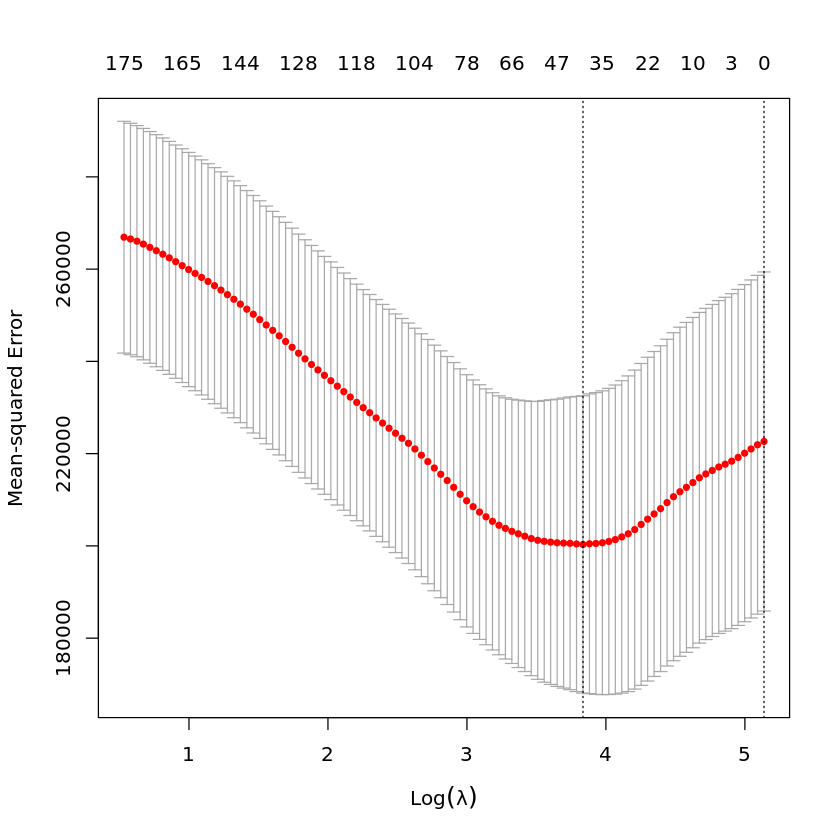

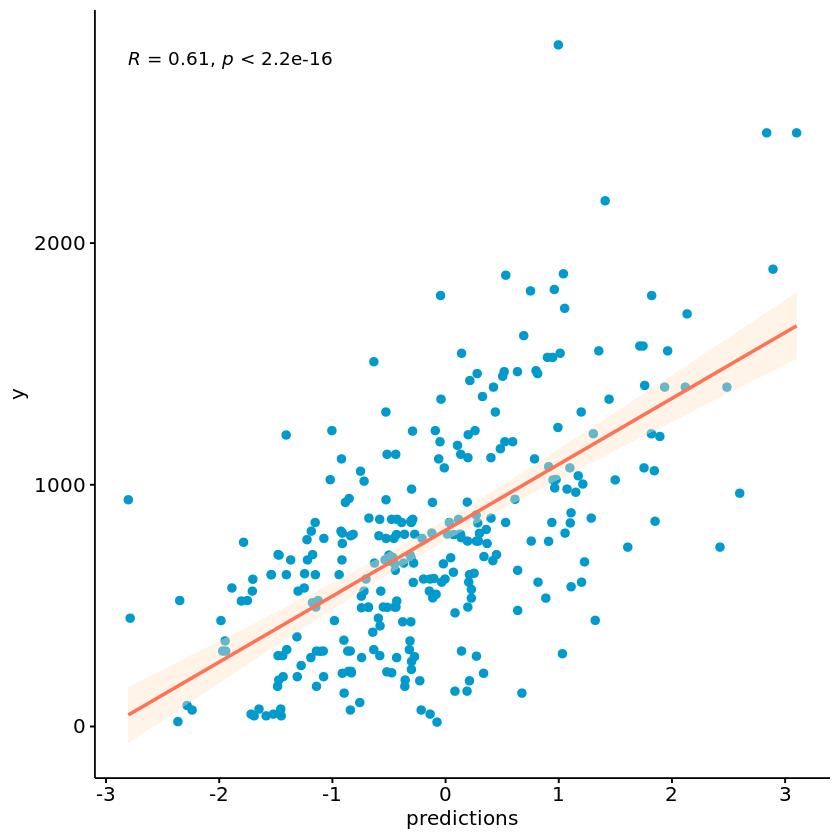

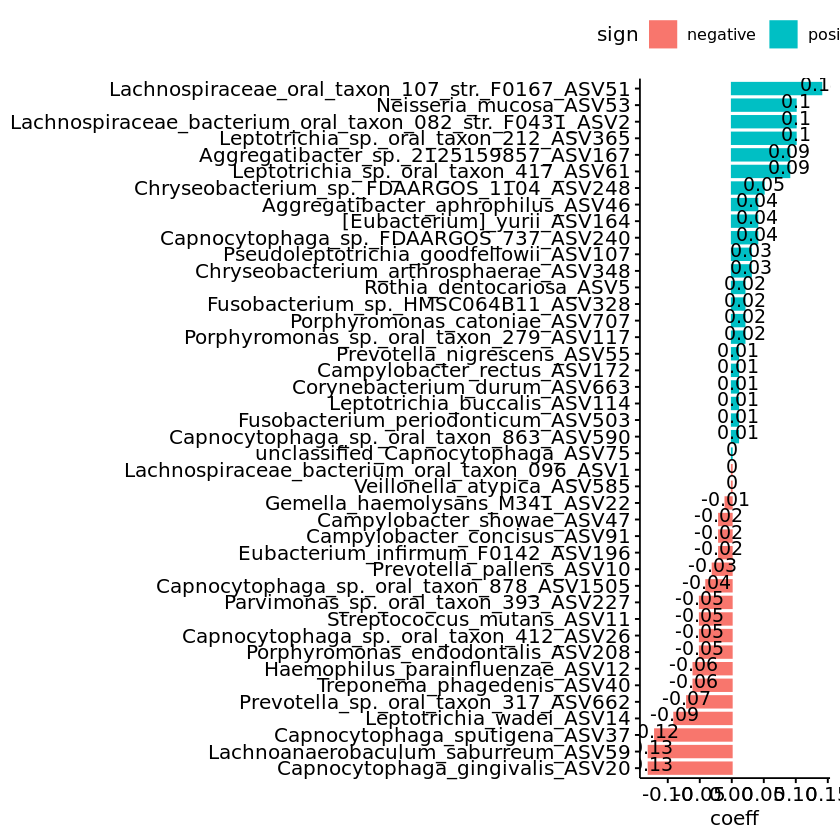

In [63]:
set.seed(852)
bal <- coda_glmnet(x, y, lambda = "lambda.min")

In [64]:
pdf("visit_one_HI_balance.pdf")
bal$`predictions plot`
bal$`signature plot`
dev.off()

png 
  2

png 
  2

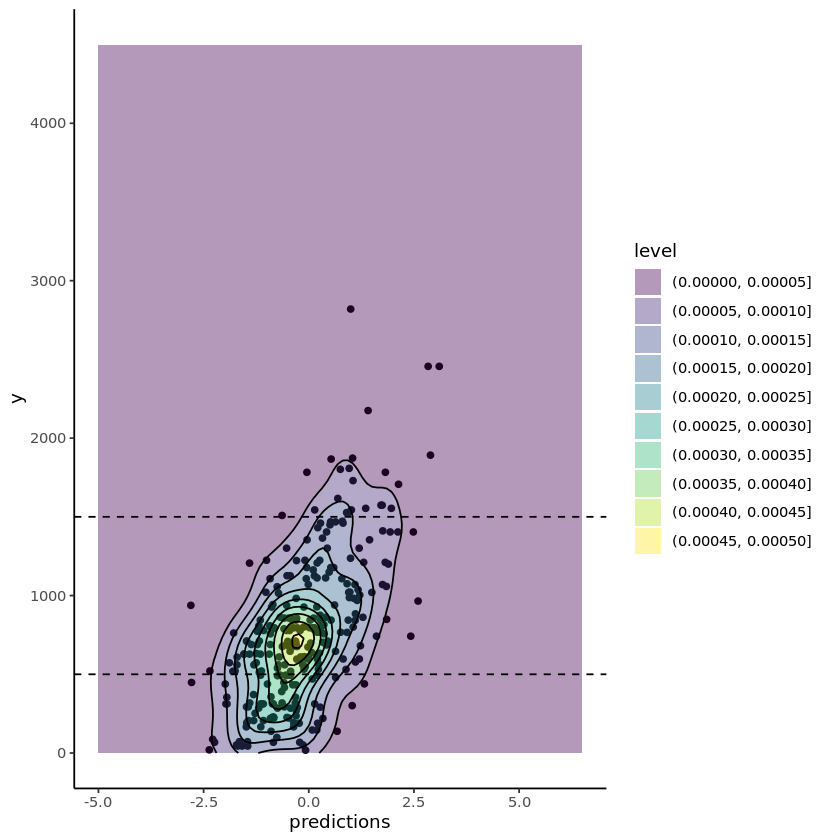

In [65]:
# how to show a shift in distribution of CD4 counts? 
test <- bal$`predictions plot`
ggplot(test$data, aes(x=predictions, y=y)) + 
    geom_point() + 
    geom_density_2d_filled(alpha=0.4) + 
    geom_density_2d(colour="black") +
    theme_classic() +
    geom_hline(yintercept=c(500, 1500), linetype="dashed") +
    ylim(0,4500) +
    xlim(-5,6.5)
pdf("hi_v1_density_plot.pdf")
ggplot(test$data, aes(x=predictions, y=y)) + 
    geom_point() + 
    geom_density_2d_filled(alpha=0.4) + 
    geom_density_2d(colour="black") +
    theme_classic() +
    geom_hline(yintercept=c(500, 1500), linetype="dashed") +
    ylim(0,4500) +
    xlim(-5,6.5)
dev.off()

### Visit two

[1] 216 114

[1] 216

[1] 960.6528

[1] 571.9557

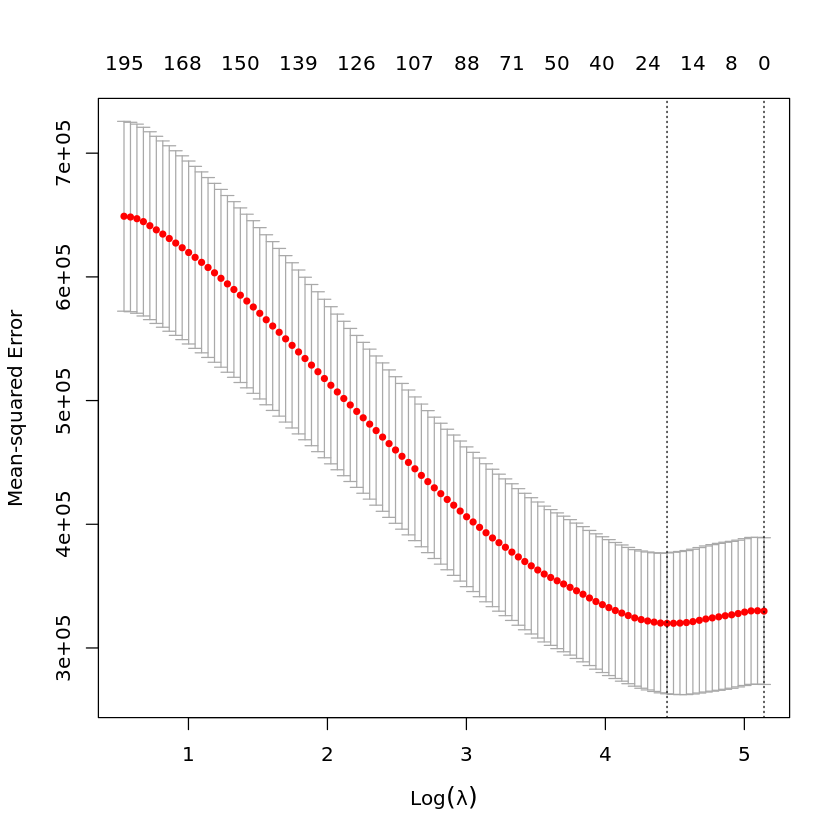

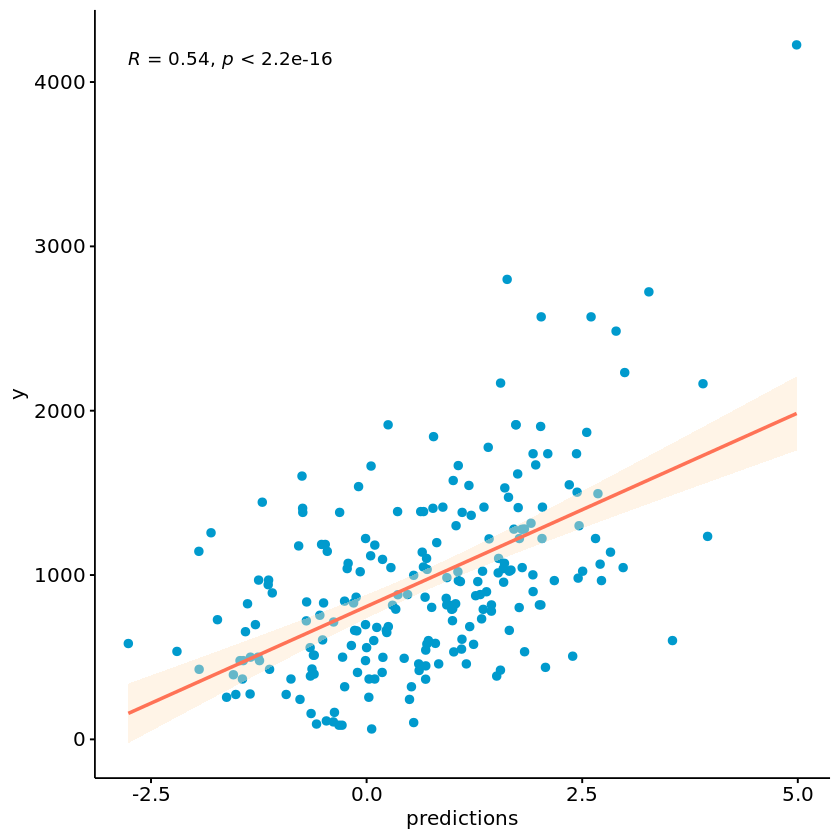

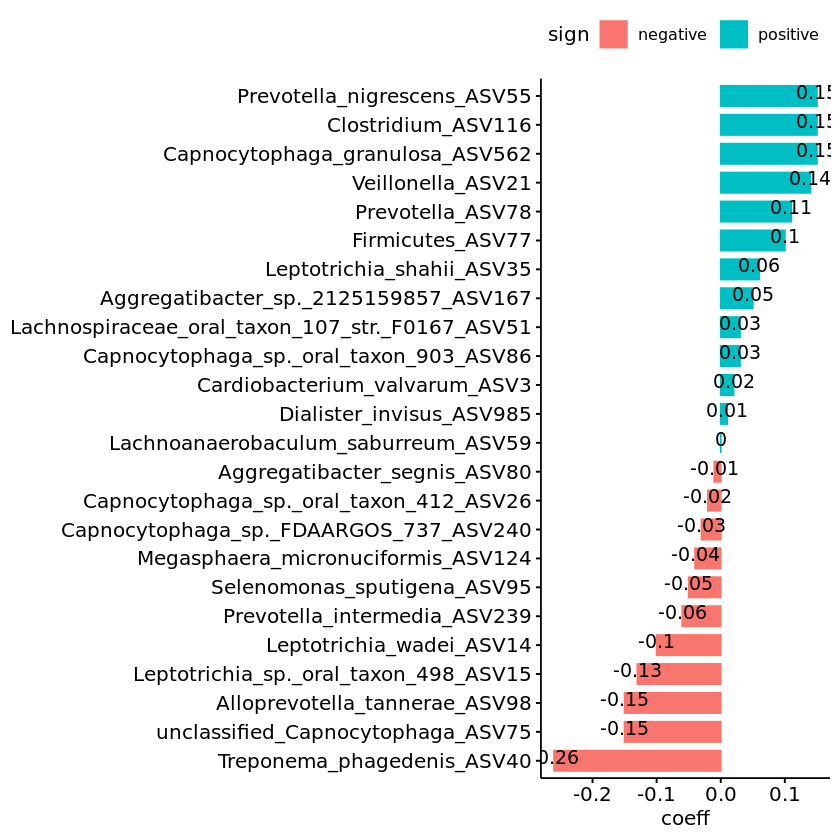

In [66]:
# visit three
glom <- temp
glom <- subset_samples(glom, hiv_status == "HI" & visit_num == "2")
glom <- filter_taxa(glom, function(x) sum(x > 100) > (0.1*length(x)), TRUE)    
# remove samples with no value in cd4 count
glom <- subset_samples(glom, cd4_count != "unknown")
sample_data(glom)$cd4_count <- as.numeric(sample_data(glom)$cd4_count)
# pull data
dat <- t(as.data.frame(otu_table(glom)))
map <- as.data.frame(as.matrix(sample_data(glom))) # have to coerce to data frame
map <- tibble::rownames_to_column(map) # retain rownames for downstream processing
# get corresponding taxonomy name for each asv
taxa <- as(tax_table(glom), "matrix")
taxadf <- as.data.frame(taxa)
orderdf <- select(taxadf, V8)
orderdf <- orderdf %>%
    rownames_to_column(var = "ASV")
# rename ASV at species level
dat <- as.data.frame(dat)
dat <- dat %>% 
    rownames_to_column(var = "ASV")
dat <- left_join(dat, orderdf, by=c('ASV'='ASV'))  
rownames(dat) <- paste(dat$V8, dat$ASV, sep="_")
dat <- dat[2:(length(dat)-1)] #remove last column
dat <- as.matrix(t(dat))
# merge new metadata with asv table so the response variable is in the same order
datmerge <- merge(dat, map, by.x = "row.names", by.y = "rowname")
datmerge <- datmerge[!duplicated(datmerge[c('Row.names')]), ]
row.names(datmerge) <- datmerge$Row.names
# define data and response variable
dif <- dim(datmerge)[2] - dim(map)[2]
x <- datmerge[,2:dif]
# make sure only numeric data
x <- select_if(x, is.numeric)
dim(x)
# define response variable 
y <- as.numeric(datmerge$cd4_count)
length(y)
# some stats
mean(y)
sd(y)
bal <- coda_glmnet(x, y, lambda = "lambda.min")

In [67]:
pdf("visit_two_HI_balance.pdf")
bal$`predictions plot`
bal$`signature plot`
dev.off()

png 
  2

png 
  2

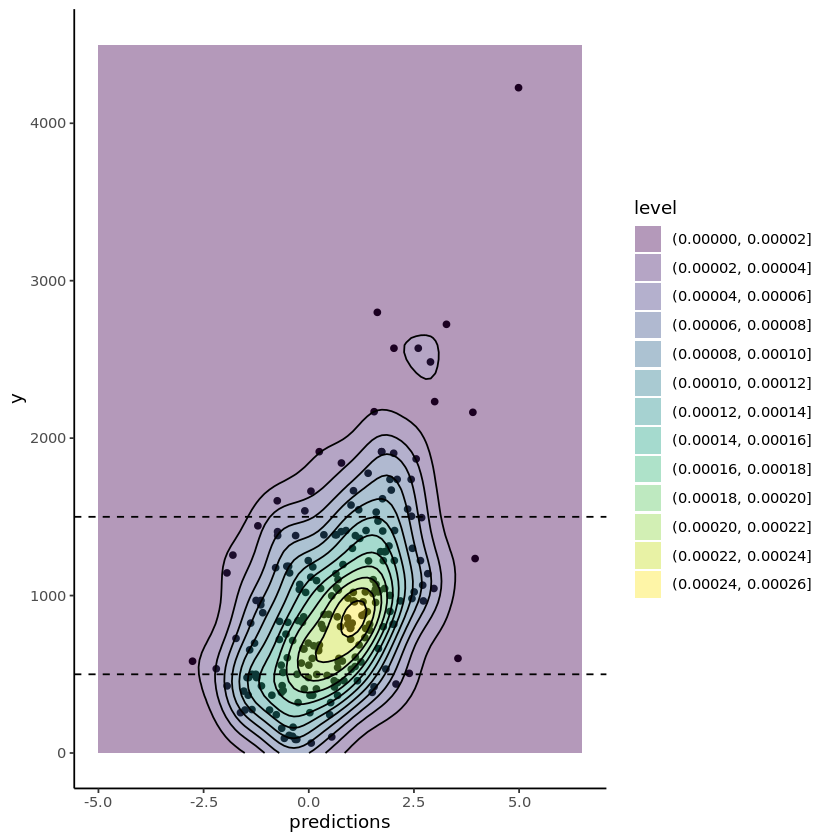

In [68]:
test <- bal$`predictions plot`
ggplot(test$data, aes(x=predictions, y=y)) + 
    geom_point() + 
    geom_density_2d_filled(alpha=0.4) + 
    geom_density_2d(colour="black") +
    theme_classic() +
    geom_hline(yintercept=c(500, 1500), linetype="dashed") +
    ylim(0,4500) +
    xlim(-5,6.5)
pdf("hi_v2_density_plot.pdf")
ggplot(test$data, aes(x=predictions, y=y)) + 
    geom_point() + 
    geom_density_2d_filled(alpha=0.4) + 
    geom_density_2d(colour="black") +
    theme_classic() +
    geom_hline(yintercept=c(500, 1500), linetype="dashed") +
    ylim(0,4500) +
    xlim(-5,6.5)
dev.off()

[1] 228 109

[1] 228

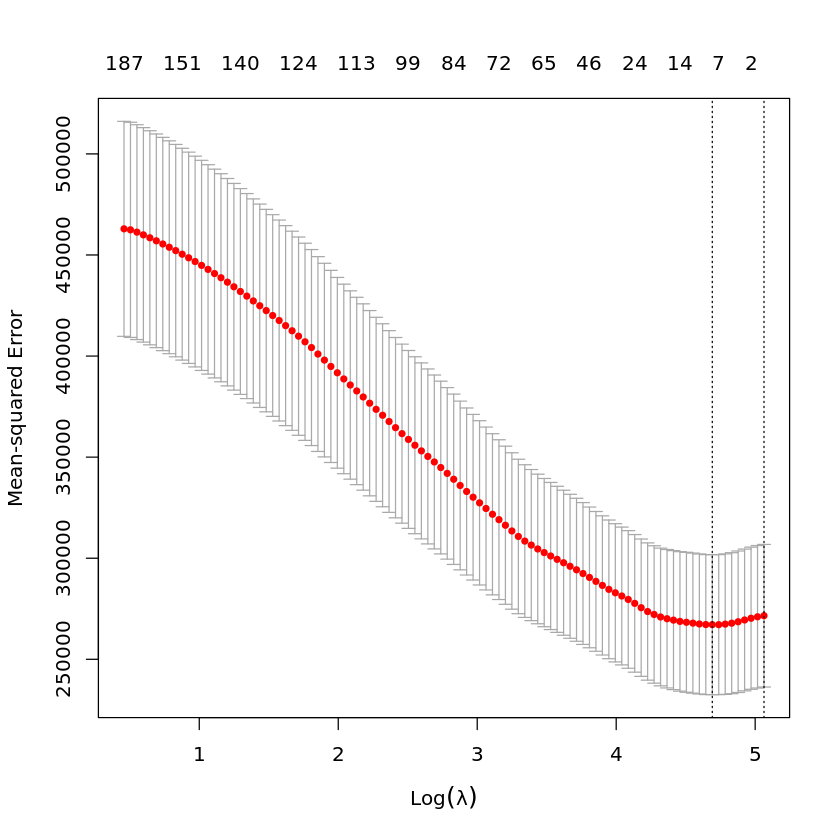

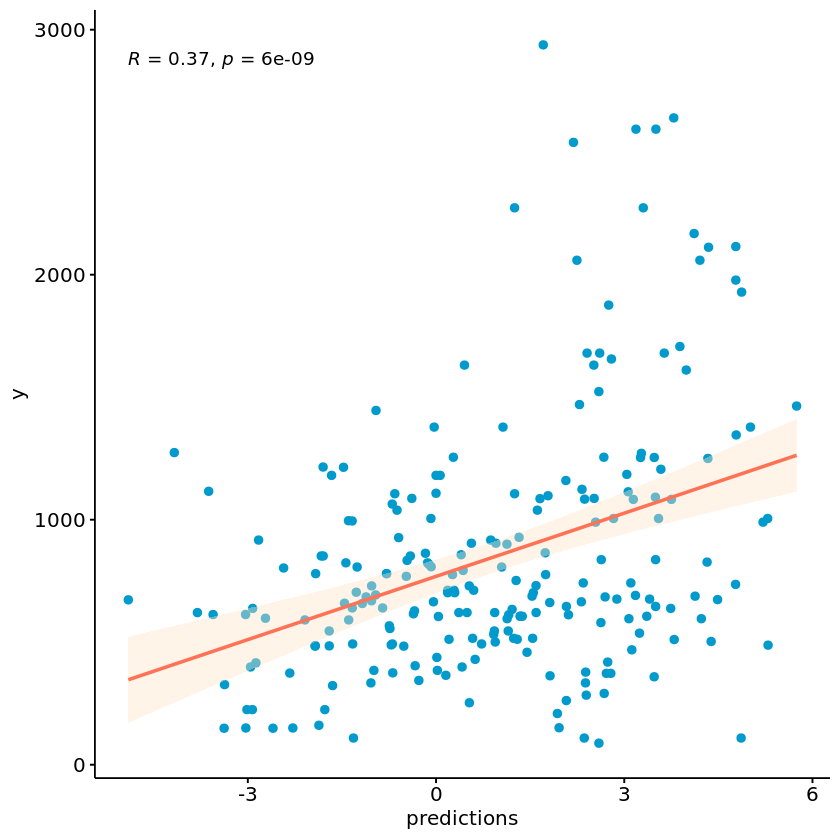

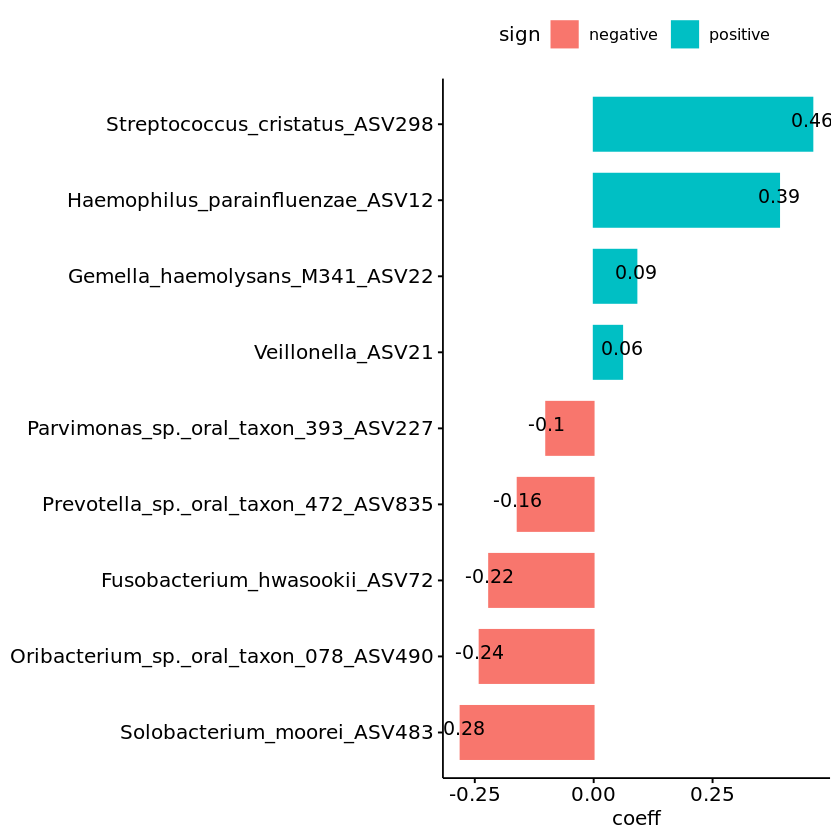

In [69]:
# visit three
glom <- temp
glom <- subset_samples(glom, hiv_status == "HI" & visit_num == "3")
glom <- filter_taxa(glom, function(x) sum(x > 100) > (0.1*length(x)), TRUE)    
# remove samples with no value in cd4 count
glom <- subset_samples(glom, cd4_count != "unknown")
sample_data(glom)$cd4_count <- as.numeric(sample_data(glom)$cd4_count)
# pull data
dat <- t(as.data.frame(otu_table(glom)))
map <- as.data.frame(as.matrix(sample_data(glom))) # have to coerce to data frame
map <- tibble::rownames_to_column(map) # retain rownames for downstream processing
# get corresponding taxonomy name for each asv
taxa <- as(tax_table(glom), "matrix")
taxadf <- as.data.frame(taxa)
orderdf <- select(taxadf, V8)
orderdf <- orderdf %>%
    rownames_to_column(var = "ASV")
# rename ASV at species level
dat <- as.data.frame(dat)
dat <- dat %>% 
    rownames_to_column(var = "ASV")
dat <- left_join(dat, orderdf, by=c('ASV'='ASV'))  
rownames(dat) <- paste(dat$V8, dat$ASV, sep="_")
dat <- dat[2:(length(dat)-1)] #remove last column
dat <- as.matrix(t(dat))
# merge new metadata with asv table so the response variable is in the same order
datmerge <- merge(dat, map, by.x = "row.names", by.y = "rowname")
datmerge <- datmerge[!duplicated(datmerge[c('Row.names')]), ]
row.names(datmerge) <- datmerge$Row.names
# define data and response variable
dif <- dim(datmerge)[2] - dim(map)[2]
x <- datmerge[,2:dif]
# make sure only numeric data
x <- select_if(x, is.numeric)
dim(x)
# define response variable 
y <- as.numeric(datmerge$cd4_count)
length(y)
bal <- coda_glmnet(x, y, lambda = "lambda.min")

In [70]:
pdf("visit_three_HI_balance.pdf")
bal$`predictions plot`
bal$`signature plot`
dev.off()

png 
  2

In [71]:
# get some stats about our cd4 analyses
mean(y)
sd(y)

[1] 850.3421

[1] 520.8048

png 
  2

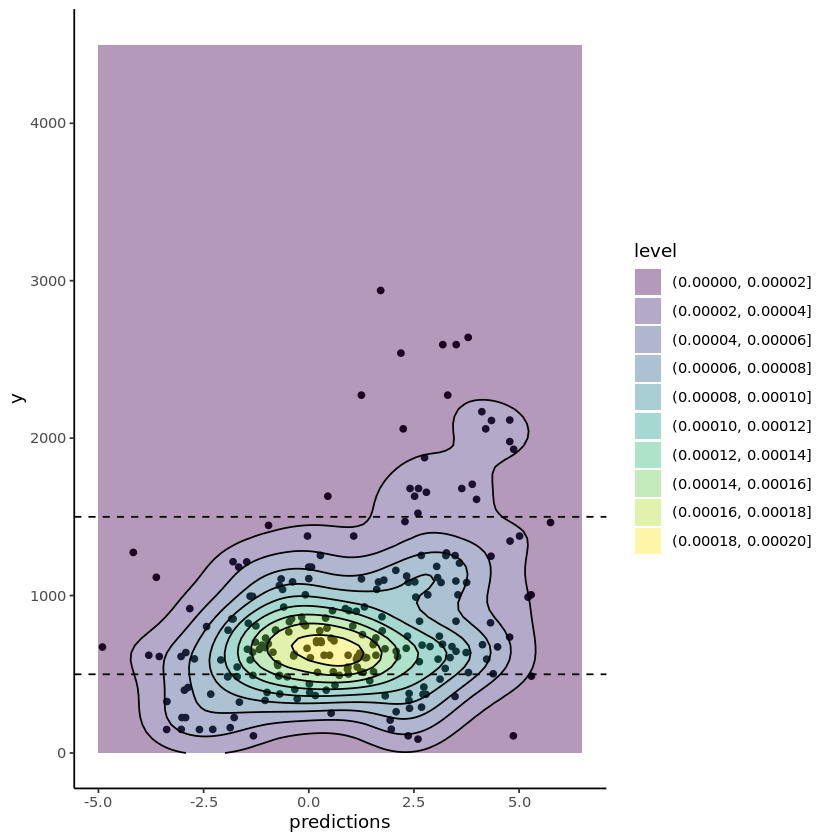

In [72]:
test <- bal$`predictions plot`
ggplot(test$data, aes(x=predictions, y=y)) + 
    geom_point() + 
    geom_density_2d_filled(alpha=0.4) + 
    geom_density_2d(colour="black") +
    theme_classic() +
    geom_hline(yintercept=c(500, 1500), linetype="dashed") +
    ylim(0,4500) +
    xlim(-5,6.5)
pdf("hi_v3_density_plot.pdf")
ggplot(test$data, aes(x=predictions, y=y)) + 
    geom_point() + 
    geom_density_2d_filled(alpha=0.4) + 
    geom_density_2d(colour="black") +
    theme_classic() +
    geom_hline(yintercept=c(500, 1500), linetype="dashed") +
    ylim(0,4500) +
    xlim(-5,6.5)
dev.off()

### HUU V1

[1] 231 112

[1] 231

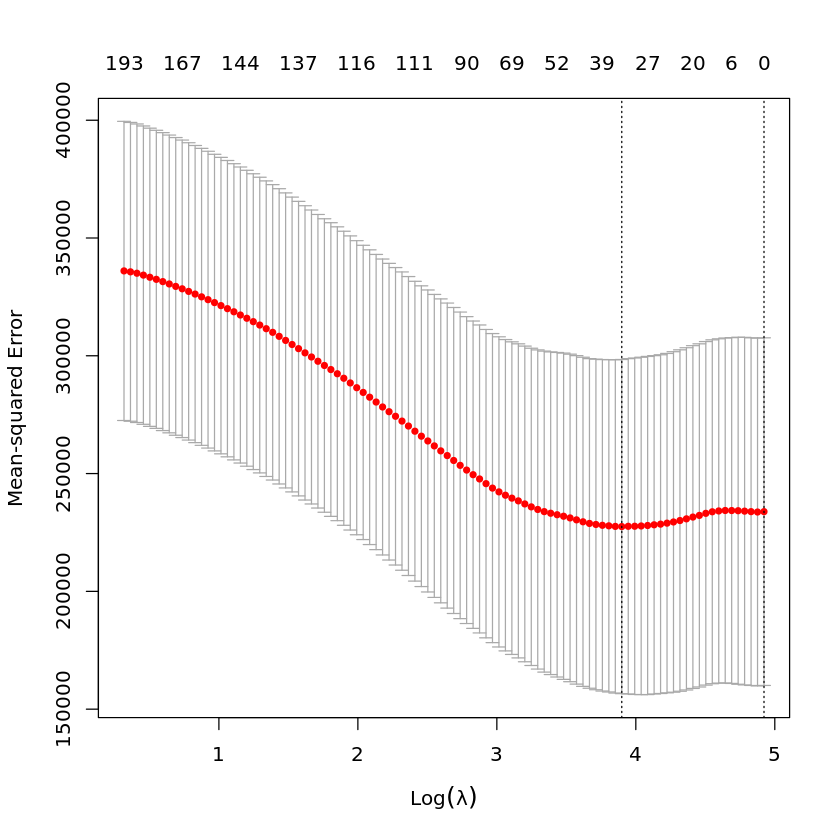

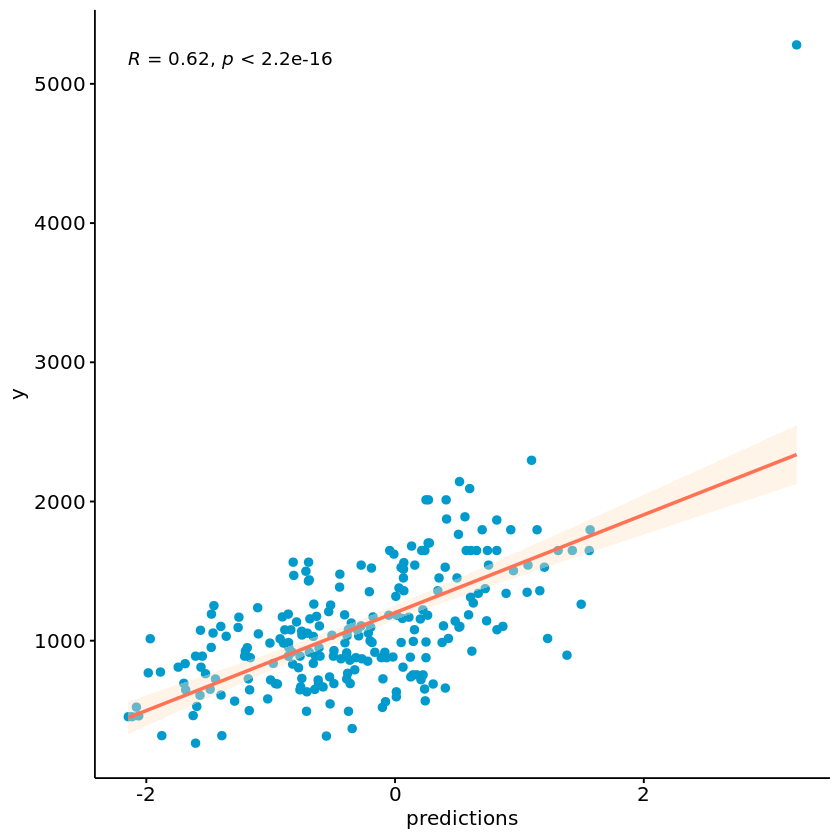

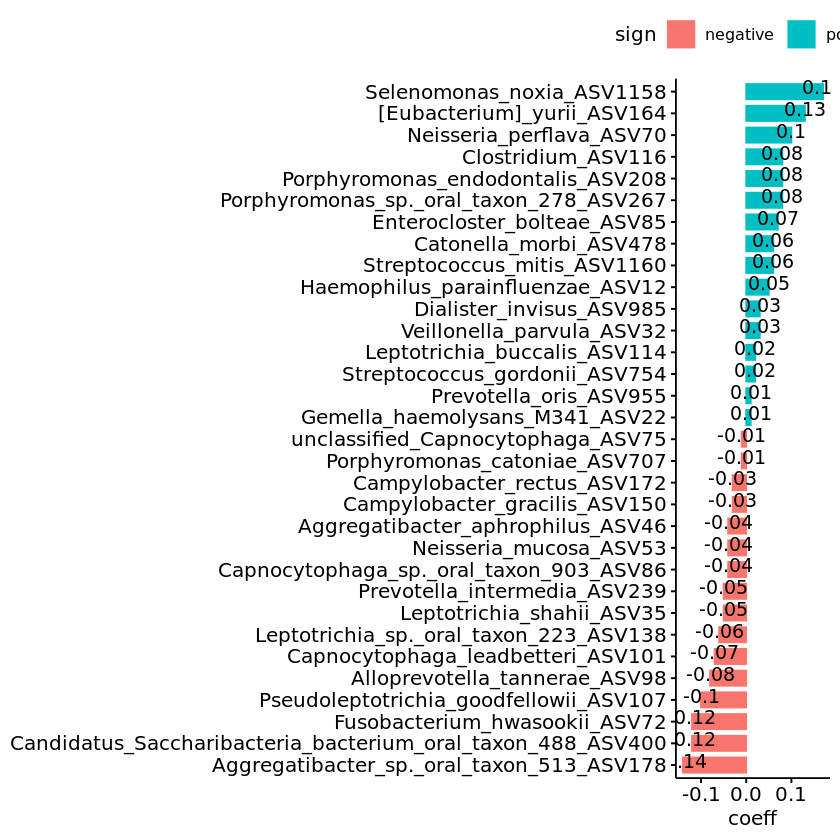

In [75]:
glom <- temp
glom <- subset_samples(glom, hiv_status == "HUU" & visit_num == "1")
glom <- filter_taxa(glom, function(x) sum(x > 100) > (0.1*length(x)), TRUE)    
# remove samples with no value in cd4 count
glom <- subset_samples(glom, cd4_count != "unknown")
sample_data(glom)$cd4_count <- as.numeric(sample_data(glom)$cd4_count)
# pull data
dat <- t(as.data.frame(otu_table(glom)))
map <- as.data.frame(as.matrix(sample_data(glom))) # have to coerce to data frame
map <- tibble::rownames_to_column(map) # retain rownames for downstream processing
# get corresponding taxonomy name for each asv
taxa <- as(tax_table(glom), "matrix")
taxadf <- as.data.frame(taxa)
orderdf <- select(taxadf, V8)
orderdf <- orderdf %>%
    rownames_to_column(var = "ASV")
# rename ASV at species level
dat <- as.data.frame(dat)
dat <- dat %>% 
    rownames_to_column(var = "ASV")
dat <- left_join(dat, orderdf, by=c('ASV'='ASV'))  
rownames(dat) <- paste(dat$V8, dat$ASV, sep="_")
dat <- dat[2:(length(dat)-1)] #remove last column
dat <- as.matrix(t(dat))
# merge new metadata with asv table so the response variable is in the same order
datmerge <- merge(dat, map, by.x = "row.names", by.y = "rowname")
datmerge <- datmerge[!duplicated(datmerge[c('Row.names')]), ]
row.names(datmerge) <- datmerge$Row.names
# define data and response variable
dif <- dim(datmerge)[2] - dim(map)[2]
x <- datmerge[,2:dif]
# make sure only numeric data
x <- select_if(x, is.numeric)
dim(x)
# define response variable 
y <- as.numeric(datmerge$cd4_count)
length(y)
bal <- coda_glmnet(x, y, lambda = "lambda.min")

In [76]:
# get some stats about our cd4 analyses
mean(y)
sd(y)

[1] 1094.987

[1] 483.123

In [85]:
test <- bal$`predictions plot`
ggplot(test$data, aes(x=predictions, y=y)) + 
    geom_point() + 
    geom_density_2d_filled(alpha=0.4) + 
    geom_density_2d(colour="black") +
    theme_classic() +
    geom_hline(yintercept=c(500, 1500), linetype="dashed") +
    ylim(0,5500) +
    xlim(-5,6.5)
pdf("huu_v1_density_plot.pdf")
ggplot(test$data, aes(x=predictions, y=y)) + 
    geom_point() + 
    geom_density_2d_filled(alpha=0.4) + 
    geom_density_2d(colour="black") +
    theme_classic() +
    geom_hline(yintercept=c(500, 1500), linetype="dashed") +
    ylim(0,5500) +
    xlim(-5,6.5)
dev.off()

Warning message:
“Computation failed in `stat_density2d_filled()`
Caused by error in `MASS::kde2d()`:
! bandwidths must be strictly positive”
Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”
Warning message in max(f):
“no non-missing arguments to max; returning -Inf”
ERROR while rich displaying an object: Error in `geom_density_2d_filled()`:
! Problem while computing stat.
ℹ Error occurred in the 2nd layer.
Caused by error in `seq_len()`:
! argument must be coercible to non-negative integer

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(ex

png 
  2

### HUU V2

[1] 191 112

[1] 191

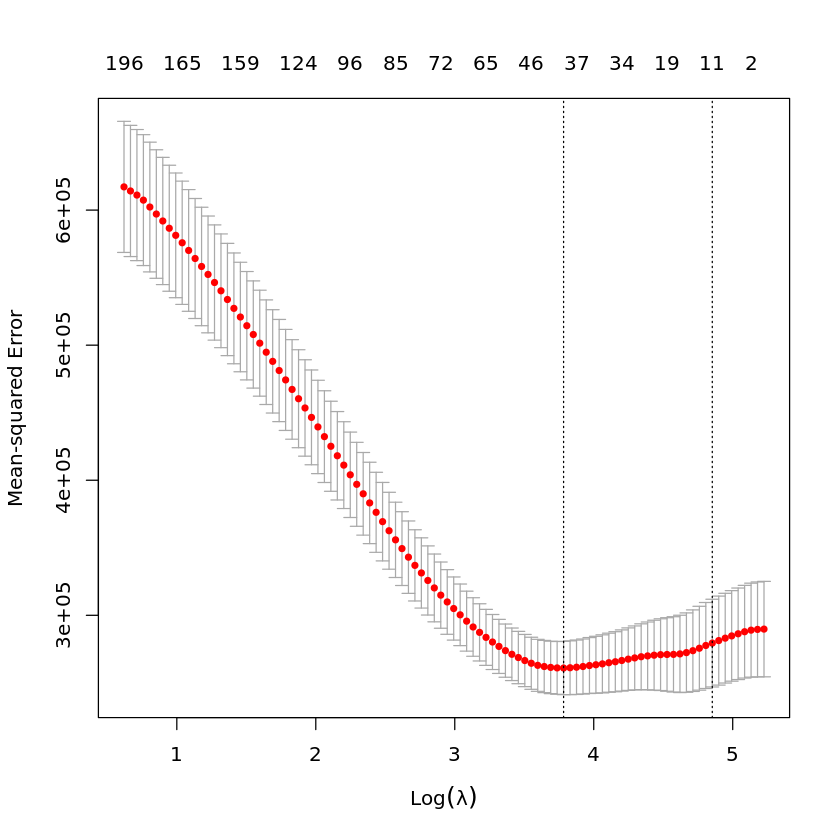

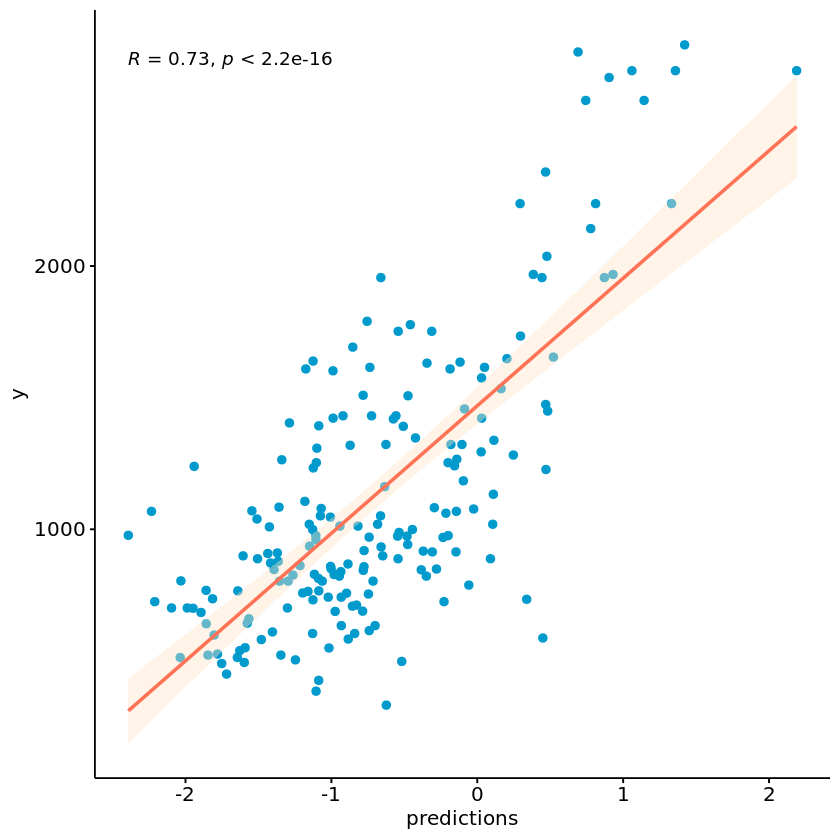

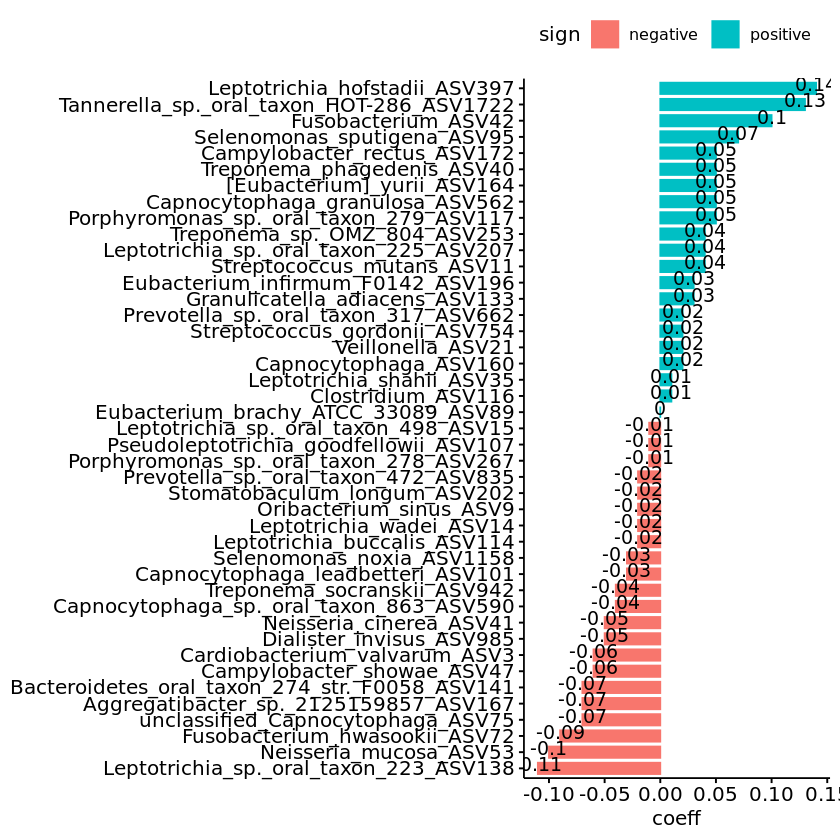

In [80]:
glom <- temp
glom <- subset_samples(glom, hiv_status == "HUU" & visit_num == "2")
glom <- filter_taxa(glom, function(x) sum(x > 100) > (0.1*length(x)), TRUE)    
# remove samples with no value in cd4 count
glom <- subset_samples(glom, cd4_count != "unknown")
sample_data(glom)$cd4_count <- as.numeric(sample_data(glom)$cd4_count)
# pull data
dat <- t(as.data.frame(otu_table(glom)))
map <- as.data.frame(as.matrix(sample_data(glom))) # have to coerce to data frame
map <- tibble::rownames_to_column(map) # retain rownames for downstream processing
# get corresponding taxonomy name for each asv
taxa <- as(tax_table(glom), "matrix")
taxadf <- as.data.frame(taxa)
orderdf <- select(taxadf, V8)
orderdf <- orderdf %>%
    rownames_to_column(var = "ASV")
# rename ASV at species level
dat <- as.data.frame(dat)
dat <- dat %>% 
    rownames_to_column(var = "ASV")
dat <- left_join(dat, orderdf, by=c('ASV'='ASV'))  
rownames(dat) <- paste(dat$V8, dat$ASV, sep="_")
dat <- dat[2:(length(dat)-1)] #remove last column
dat <- as.matrix(t(dat))
# merge new metadata with asv table so the response variable is in the same order
datmerge <- merge(dat, map, by.x = "row.names", by.y = "rowname")
datmerge <- datmerge[!duplicated(datmerge[c('Row.names')]), ]
row.names(datmerge) <- datmerge$Row.names
# define data and response variable
dif <- dim(datmerge)[2] - dim(map)[2]
x <- datmerge[,2:dif]
# make sure only numeric data
x <- select_if(x, is.numeric)
dim(x)
# define response variable 
y <- as.numeric(datmerge$cd4_count)
length(y)
bal <- coda_glmnet(x, y, lambda = "lambda.min")

[1] 1132.361

[1] 537.8501

png 
  2

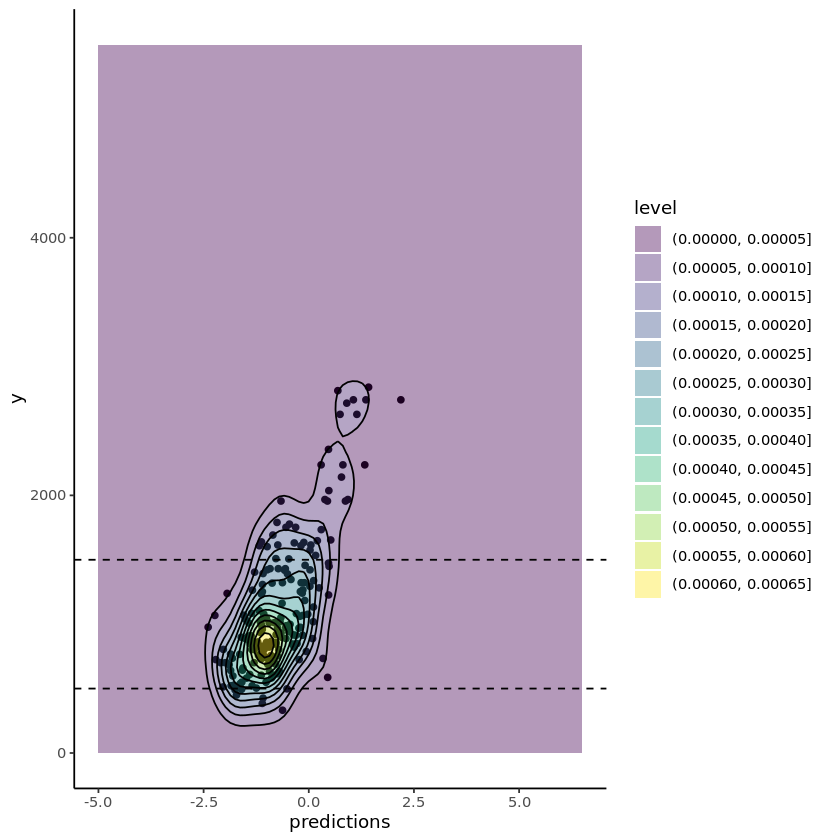

In [81]:
# get some stats about our cd4 analyses
mean(y)
sd(y)
test <- bal$`predictions plot`
ggplot(test$data, aes(x=predictions, y=y)) + 
    geom_point() + 
    geom_density_2d_filled(alpha=0.4) + 
    geom_density_2d(colour="black") +
    theme_classic() +
    geom_hline(yintercept=c(500, 1500), linetype="dashed") +
    ylim(0,5500) +
    xlim(-5,6.5)
pdf("huu_v2_density_plot.pdf")
ggplot(test$data, aes(x=predictions, y=y)) + 
    geom_point() + 
    geom_density_2d_filled(alpha=0.4) + 
    geom_density_2d(colour="black") +
    theme_classic() +
    geom_hline(yintercept=c(500, 1500), linetype="dashed") +
    ylim(0,5500) +
    xlim(-5,6.5)
dev.off()

### HUU V3

[1] 192 108

[1] 192

Warning message in cor(predictions, y):
“the standard deviation is zero”
Warning message in max(.):
“no non-missing arguments to max; returning -Inf”


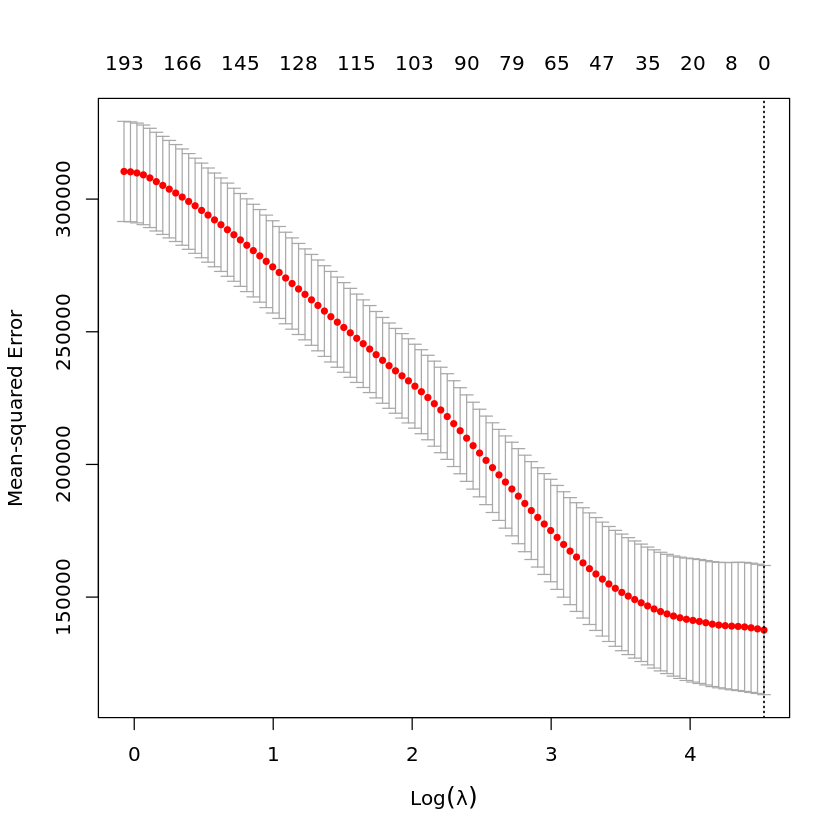

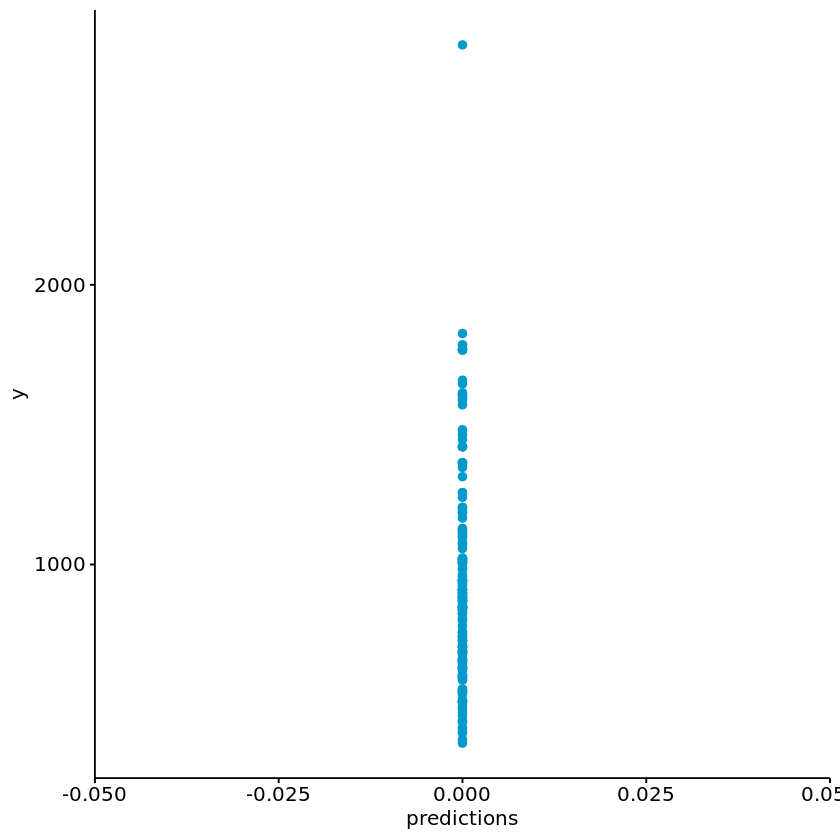

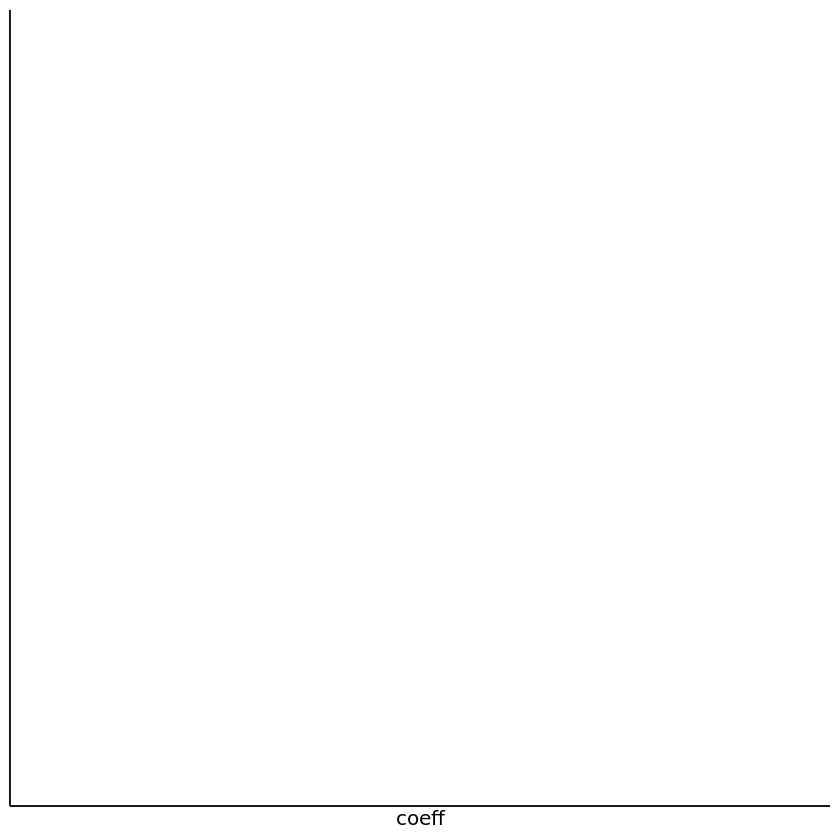

In [82]:
glom <- temp
glom <- subset_samples(glom, hiv_status == "HUU" & visit_num == "3")
glom <- filter_taxa(glom, function(x) sum(x > 100) > (0.1*length(x)), TRUE)    
# remove samples with no value in cd4 count
glom <- subset_samples(glom, cd4_count != "unknown")
sample_data(glom)$cd4_count <- as.numeric(sample_data(glom)$cd4_count)
# pull data
dat <- t(as.data.frame(otu_table(glom)))
map <- as.data.frame(as.matrix(sample_data(glom))) # have to coerce to data frame
map <- tibble::rownames_to_column(map) # retain rownames for downstream processing
# get corresponding taxonomy name for each asv
taxa <- as(tax_table(glom), "matrix")
taxadf <- as.data.frame(taxa)
orderdf <- select(taxadf, V8)
orderdf <- orderdf %>%
    rownames_to_column(var = "ASV")
# rename ASV at species level
dat <- as.data.frame(dat)
dat <- dat %>% 
    rownames_to_column(var = "ASV")
dat <- left_join(dat, orderdf, by=c('ASV'='ASV'))  
rownames(dat) <- paste(dat$V8, dat$ASV, sep="_")
dat <- dat[2:(length(dat)-1)] #remove last column
dat <- as.matrix(t(dat))
# merge new metadata with asv table so the response variable is in the same order
datmerge <- merge(dat, map, by.x = "row.names", by.y = "rowname")
datmerge <- datmerge[!duplicated(datmerge[c('Row.names')]), ]
row.names(datmerge) <- datmerge$Row.names
# define data and response variable
dif <- dim(datmerge)[2] - dim(map)[2]
x <- datmerge[,2:dif]
# make sure only numeric data
x <- select_if(x, is.numeric)
dim(x)
# define response variable 
y <- as.numeric(datmerge$cd4_count)
length(y)
bal <- coda_glmnet(x, y, lambda = "lambda.min")

In [ ]:
# get some stats about our cd4 analyses
mean(y)
sd(y)
test <- bal$`predictions plot`
ggplot(test$data, aes(x=predictions, y=y)) + 
    geom_point() + 
    geom_density_2d_filled(alpha=0.4) + 
    geom_density_2d(colour="black") +
    theme_classic() +
    geom_hline(yintercept=c(500, 1500), linetype="dashed") +
    ylim(0,5500) +
    xlim(-5,6.5)
pdf("huu_v3_density_plot.pdf")
ggplot(test$data, aes(x=predictions, y=y)) + 
    geom_point() + 
    geom_density_2d_filled(alpha=0.4) + 
    geom_density_2d(colour="black") +
    theme_classic() +
    geom_hline(yintercept=c(500, 1500), linetype="dashed") +
    ylim(0,5500) +
    xlim(-5,6.5)
dev.off()